### For a given dataset, k is specified to be the number of distinct groups the points belong to. 

These k centroids are first randomly initialized, then iterations are performed to optimize the locations of these k centroids as follows:

- The distance from each point to each centroid is calculated.
- Points are assigned to their nearest centroid.
- Centroids are shifted to be the average value of the points belonging to it. If the centroids did not move, the algorithm is finished, else repeat.

### Build from scratch

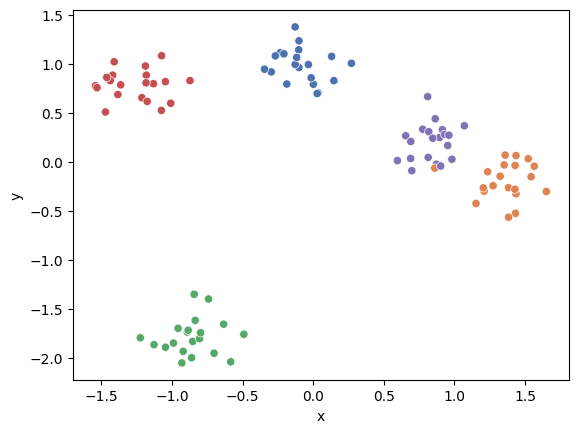

In [1]:
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
centers = 5
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
X_train = std.fit_transform(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [2]:
from random import uniform
import numpy as np

def euclidean_distance(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [14]:
class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
        self.centroids = [uniform(min_, max_) for _ in range(self.n_clusters)]
    def fit(self, X_train):
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean_distance(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            iteration += 1
            
    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean_distance(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs

/home/abir/miniconda3/envs/simple_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/abir/miniconda3/envs/simple_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


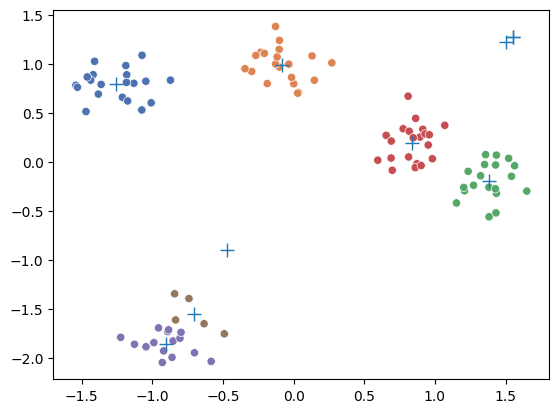

In [17]:
kmeans = KMeans(n_clusters=10) # Initialize KMeans with 5 clusters to match the number of true clusters
kmeans.fit(X_train)
# View results
class_centers, classification = kmeans.evaluate(X_train)

sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         '+',
         markersize=10,
         )
plt.show()

### Built in sklearn

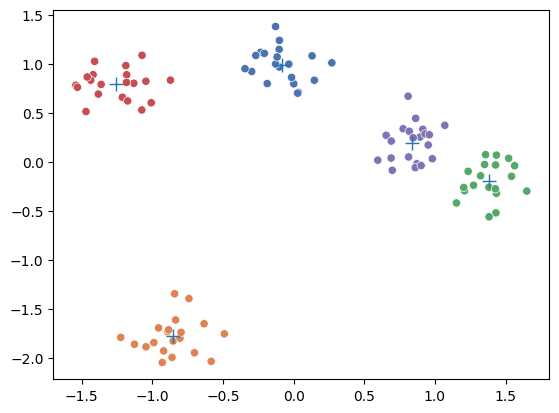

In [19]:
from sklearn.cluster import KMeans as kms
kmeans = kms(n_clusters=5, random_state=42, n_init="auto").fit(X_train)


sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=kmeans.labels_,
                palette="deep",
                legend=None
                )

plt.plot([x for x, _ in kmeans.cluster_centers_],
         [y for _, y in kmeans.cluster_centers_],
         '+',
         markersize=10,
         )
plt.show()